In [9]:
import os
import sys
import platform

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
if 'Windows' in platform.platform() and '8.1' in platform.release():
    _ = "C:\\Users\\Andrey\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '7' in platform.release():
    _ = "E:\\Disk.Yandex\\3.Programing\\"
    DATA_DIR = "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '10' in platform.release():
    _ = "F:\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    ALL_DATA = "F:\\YandexDisk\\1.Работа\\Результаты обработки\\"
    DELIMITER = "\\"    
    
elif 'Linux' in platform.platform() and '4.4.0' in platform.release():
    _ = "/home/andr/Yandex.Disk/3.Programing/"
    DATA_DIR = _ + "work/PulseViewer/pulsarsData/"
    PATTERN_DIR = _ + "/work/PulseViewer/frame_of_AP/patterns/"
    PACK_DIR = _ + "myPacks/"
    ALL_DATA = "/home/andr/Yandex.Disk/1.Работа/Результаты обработки/"
    DELIMITER = "/"
    
else:
    print('unknown system', platform.platform(), platform.release())

sys.path.append(PACK_DIR)
from PRAO import *
from TOA import *

In [3]:
gp_table = pd.read_table('crab_gp_kaz_pulses_full.csv', sep='\t')

In [18]:
gp_table

,Date,Time start,"point of gp, point",MJD,amp_GP,"E, Jy*ms","W50, point","W10, point","Period, s","Numpointwin, point","Tay, ms","Median, adc u","STD, adc u",path obs plot,path obs data,path plot,fName
0,05.09.2010,07:04:25.4187240,21354,55444.128679,1813.415960,85440.017362,19.17135,99.00000,5.988559,2430,2.4576,1720.0,11.285902,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,./gp_plot/05.09.2010_plot_0531+21_0.png,./gp_plot_txt/05.09.2010_plot_0531+21_1.csv
1,09.09.2010,06:48:41.8374290,45640,55448.118449,1841.280215,87380.038994,19.30995,54.57375,5.988578,2430,2.4576,1720.0,12.771049,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv
2,12.09.2010,06:36:54.1340866,36629,55451.110002,1833.193160,88066.707345,19.54755,63.99360,5.988594,2430,2.4576,1720.0,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv
3,17.09.2010,06:17:14.6399831,41855,55456.096499,1826.751170,84423.836687,18.80505,39.28815,5.988624,2430,2.4576,1720.0,12.099526,./obs_plot/17.09.2010_plot_0531+21.png,.\obs_data\17.09.2010_obs_0531+21.csv,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv
4,17.10.2010,04:19:17.6313152,27361,55486.014177,1952.176380,103329.549129,21.53745,74.91825,5.988894,2430,2.4576,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv
5,17.10.2010,04:19:17.6313152,3239,55486.013491,1886.038030,60135.906753,12.97395,91.20375,5.988894,2430,2.4576,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,./gp_plot/17.10.2010_plot_0531+21_1.png,./gp_plot_txt/17.10.2010_plot_0531+21_2.csv
6,18.10.2010,04:15:21.7248325,32615,55487.011596,1802.396050,49970.184093,11.28105,37.03590,5.988906,2430,2.4576,1720.0,13.818881,./obs_plot/18.10.2010_plot_0531+21.png,.\obs_data\18.10.2010_obs_0531+21.csv,./gp_plot/18.10.2010_plot_0531+21_0.png,./gp_plot_txt/18.10.2010_plot_0531+21_1.csv
7,19.10.2010,04:11:25.8177452,26891,NaN,1822.669660,71840.504235,16.03800,38.49615,5.988917,2430,2.4576,1720.0,15.235970,./obs_plot/19.10.2010_plot_0531+21.png,.\obs_data\19.10.2010_obs_0531+21.csv,./gp_plot/19.10.2010_plot_0531+21_1.png,./gp_plot_txt/19.10.2010_plot_0531+21_2.csv
8,19.10.2010,04:11:25.8177452,20817,NaN,1809.004110,63467.472995,14.27580,36.80325,5.988917,2430,2.4576,1720.0,15.235970,./obs_plot/19.10.2010_plot_0531+21.png,.\obs_data\19.10.2010_obs_0531+21.csv,./gp_plot/19.10.2010_plot_0531+21_2.png,./gp_plot_txt/19.10.2010_plot_0531+21_3.csv
9,27.10.2010,03:39:58.6513328,53762,NaN,1907.423100,78615.256697,16.77060,49.09410,5.989016,2430,2.4576,1720.0,12.880338,./obs_plot/27.10.2010_plot_0531+21.png,.\obs_data\27.10.2010_obs_0531+21.csv,./gp_plot/27.10.2010_plot_0531+21_0.png,./gp_plot_txt/27.10.2010_plot_0531+21_1.csv


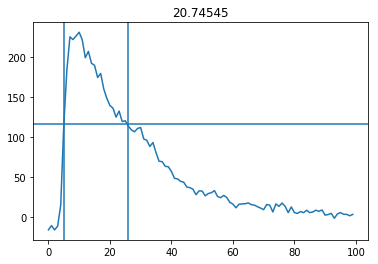

In [15]:
for index, row in gp_table.iterrows():
    pulse = np.loadtxt(row['fName'], skiprows=4)
    w_p, l_e, r_e = width_of_pulse(pulse, 0.5)
    
    plt.close()
    plt.title(str(w_p))
    plt.plot(pulse)
    plt.axvline(l_e)
    plt.axvline(r_e)
    plt.axhline(0.5*max(pulse))
    plt.savefig('./width_of_pulse/' + os.path.basename(row['fName'])[:-4] + '.png', format='png')

In [20]:
gp_table[gp_table['Date'].str.contains('2013')]

,Date,Time start,"point of gp, point",MJD,amp_GP,"E, Jy*ms","W50, point","W10, point","Period, s","Numpointwin, point","Tay, ms","Median, adc u","STD, adc u",path obs plot,path obs data,path plot,fName
212,10.01.2013,22:39:15.8417205,9492,NaN,1800.034915,8649.568094,1.95525,24.25005,5.994955,2436,2.4576,1720.0,25.560255,./obs_plot/10.01.2013_plot_0531+21.png,.\obs_data\10.01.2013_obs_0531+21.csv,./gp_plot/10.01.2013_plot_0531+21_9.png,./gp_plot_txt/10.01.2013_plot_0531+21_10.csv
213,17.03.2013,18:19:46.4561462,64171,NaN,1880.589970,111985.865000,24.23025,77.31405,5.995710,2436,2.4576,1720.0,17.868166,./obs_plot/17.03.2013_plot_0531+21.png,.\obs_data\17.03.2013_obs_0531+21.csv,./gp_plot/17.03.2013_plot_0531+21_0.png,./gp_plot_txt/17.03.2013_plot_0531+21_1.csv
214,12.04.2013,16:37:33.0891838,30704,NaN,1801.243640,28792.821369,6.50430,19.38915,5.995806,2436,2.4576,1720.0,15.532360,./obs_plot/12.04.2013_plot_0531+21.png,.\obs_data\12.04.2013_obs_0531+21.csv,./gp_plot/12.04.2013_plot_0531+21_10.png,./gp_plot_txt/12.04.2013_plot_0531+21_11.csv
215,13.04.2013,16:33:37.1950073,2148,NaN,1812.741165,6571.559713,1.47510,43.84710,5.995808,2436,2.4576,1720.0,17.197835,./obs_plot/13.04.2013_plot_0531+21.png,.\obs_data\13.04.2013_obs_0531+21.csv,./gp_plot/13.04.2013_plot_0531+21_1.png,./gp_plot_txt/13.04.2013_plot_0531+21_2.csv
216,21.04.2013,16:02:09.9795503,13570,NaN,1824.523700,116815.178352,26.05185,71.18100,5.995814,2436,2.4576,1720.0,16.798650,./obs_plot/21.04.2013_plot_0531+21.png,.\obs_data\21.04.2013_obs_0531+21.csv,./gp_plot/21.04.2013_plot_0531+21_0.png,./gp_plot_txt/21.04.2013_plot_0531+21_1.csv
217,29.04.2013,15:30:42.7798576,46623,NaN,1843.326085,105730.494454,23.33925,48.86640,5.995813,2436,2.4576,1720.0,17.509273,./obs_plot/29.04.2013_plot_0531+21.png,.\obs_data\29.04.2013_obs_0531+21.csv,./gp_plot/29.04.2013_plot_0531+21_0.png,./gp_plot_txt/29.04.2013_plot_0531+21_1.csv
218,05.05.2013,15:07:07.3981938,40508,NaN,1851.538450,114985.976824,25.26975,70.07220,5.995807,2436,2.4576,1720.0,13.952446,./obs_plot/05.05.2013_plot_0531+21.png,.\obs_data\05.05.2013_obs_0531+21.csv,./gp_plot/05.05.2013_plot_0531+21_0.png,./gp_plot_txt/05.05.2013_plot_0531+21_1.csv
219,06.05.2013,15:03:11.4939165,1114,NaN,1824.871350,61981.782849,13.82040,99.00000,5.995805,2436,2.4576,1720.0,16.391188,./obs_plot/06.05.2013_plot_0531+21.png,.\obs_data\06.05.2013_obs_0531+21.csv,./gp_plot/06.05.2013_plot_0531+21_0.png,./gp_plot_txt/06.05.2013_plot_0531+21_1.csv
220,06.05.2013,15:03:11.4939165,3334,NaN,1802.423690,46199.557911,10.42965,99.00000,5.995805,2436,2.4576,1720.0,16.391188,./obs_plot/06.05.2013_plot_0531+21.png,.\obs_data\06.05.2013_obs_0531+21.csv,./gp_plot/06.05.2013_plot_0531+21_1.png,./gp_plot_txt/06.05.2013_plot_0531+21_2.csv
221,08.05.2013,14:55:19.6880702,40106,NaN,1814.642005,55718.152476,12.49380,47.54970,5.995802,2436,2.4576,1720.0,15.666253,./obs_plot/08.05.2013_plot_0531+21.png,.\obs_data\08.05.2013_obs_0531+21.csv,./gp_plot/08.05.2013_plot_0531+21_0.png,./gp_plot_txt/08.05.2013_plot_0531+21_1.csv
